In [2]:
import pandas as pd
import os

master_df_a = pd.DataFrame()
master_df_b = pd.DataFrame()
master_df_c = pd.DataFrame()
master_df_d = pd.DataFrame()

# folder path
dir_path = f'01-17-2024' # specify what folder to look into!

# setup list of errored files
errored_files = []

# get list of files in directory
dir_path_files = os.listdir(dir_path)

# check if a subdirectory called xlsx exists
xlsx_files = []
if "xlsx" in dir_path_files:
    xlsx_files = os.listdir(f'{dir_path}/xlsx')

# iterate through each file in directory
for file_name in dir_path_files:
    
    if file_name[-4:] != ".txt":
        continue    
    
    if f'{file_name[:-4]}.xlsx' in xlsx_files:
        print(f"skipping {file_name}...")
        continue
    
    # check if current path is a file
    current_path = os.path.join(dir_path, file_name)
    if os.path.isfile(current_path):
        print(f'importing {file_name}...', end='')
        with open(f"{dir_path}/{file_name}") as file:
            readline_file = file.readlines()    # readlines() returns a list of lines in the file
            readline_file = [i for i in readline_file if i != "\n"] # remove lines containing only "\n"
        print('done')
        
        print('\tprocessing...', end='')        
        for e, input_line in enumerate(readline_file):  # iterate through each line
            try:
                input_line = input_line.split("\t") # split line by tab
                readline_file[e] = input_line    # replace line with split line
            except IndexError:
                print(e)    # print line number of error
                raise IndexError
        print('done')
        
        print('\tsorting...', end='')
        # function to convert list of strings to list of integers
        def process_list_to_integers(list_of_strings):
            if len(list_of_strings) < 5:
                list_of_strings.append('nan')
            
            for i in range(1,4):
                # remove first 4 characters 
                list_of_strings[i] = int(list_of_strings[i][4:]) 
            try:
                # remove first 3 characters and last character
                list_of_strings[4] = list_of_strings[4][3:-1]
            except IndexError:
                print(f"IndexError on line {list_of_strings}, {list_of_strings[4]}")
                raise IndexError
            except ValueError:
                print(f"ValueError on line {list_of_strings}, {list_of_strings[4][3:-1]}")
                raise ValueError
            return list_of_strings
        
        a, b, c, d, e =[[], [], [], [], []]   # initialize lists for each sensor
        for i in readline_file: # iterate through each line
            try:
                if i[1][1] == "A":  # if sensor is A
                    a.append(process_list_to_integers(i)) # append to list a
                elif i[1][1] == "B":    # if sensor is B
                    b.append(process_list_to_integers(i)) # append to list b
                elif i[1][1] == "C":    # if sensor is C
                    c.append(process_list_to_integers(i)) # append to list c
                elif i[1][1] == "D":    # if sensor is D
                    d.append(process_list_to_integers(i)) # append to list d
                # elif i[1][1] == "E":    # if sensor is E
                #     e.append(process_list_to_integers(i)) # append to list e
                else:
                    print(f"error on line {i}")    # print error if sensor is not A, B, C, or D
            except IndexError:
                print(f"IndexError on line {i}")
                continue
            except ValueError:
                print(f"ValueError on line {i}")
                continue
                
        print("done")
        
        print('\tconverting to dataframe...', end='')
        # convert lists to dataframes
        a = pd.DataFrame(a)
        b = pd.DataFrame(b)
        c = pd.DataFrame(c)
        d = pd.DataFrame(d)
        # e = pd.DataFrame(e)
        
        print('done')
        
        print('\tlabeling columns...', end='')
        try:
            # label columns
            a.columns = ['time_A', 'A0', 'A1', 'A2', 'T_A']
            b.columns = ['time_B', 'B0', 'B1', 'B2', 'T_B']
            c.columns = ['time_C', 'C0', 'C1', 'C2', 'T_C']
            d.columns = ['time_D', 'D0', 'D1', 'D2', 'T_D']
            # e.columns = ['time_E', 'E0', 'E1', 'E2', 'T_E']
            
        except ValueError:
            print(f"ValueError on file {file_name}")
            errored_files.append(file_name)
            continue
            
        print('done')
        
        print('\tconcatenating...', end='')
        # concatenate dataframes
        master_df = pd.concat([a, b, c, d], axis=1)
        print('done')
        
        print('\texporting...', end='')
        # check if xlsx directory exists
        if not os.path.exists(f'{dir_path}/xlsx'):
            os.makedirs(f'{dir_path}/xlsx')
            
        # export to xlsx            
        master_df.to_excel(f"{dir_path}/xlsx/{file_name[:-4]}.xlsx")
        
        print('done')
print('all done')   
if len(errored_files) > 0:
    print(f"errored files: {errored_files}")

skipping breaker1_01-17-24.txt...
skipping breaker2_01-17-24.txt...
skipping breaker3_01-17-24.txt...
skipping breaker4_01-17-24.txt...
skipping breaker5_01-17-24.txt...
skipping breaker6_01-17-24.txt...
skipping clean2_01-17-24.txt...
skipping clean_01-17-24.txt...
skipping green_bruised_AB1_01-17-24.txt...
skipping green_bruised_AB2_01-17-24.txt...
skipping green_bruised_CD1_01-17-24.txt...
skipping green_bruised_CD2_01-17-24.txt...
skipping turning_bruised_1_01-17-24.txt...
skipping turning_bruised_2_01-17-24.txt...
skipping turning_bruised_3_01-17-24.txt...
skipping turning_bruised_4_01-17-24.txt...
skipping turning_bruised_5_01-17-24.txt...
all done


In [3]:
# merge!

import os
import pandas as pd

master_df = pd.DataFrame()

# specify what folder to look into!!
files_path = '01-17-2024/xlsx'

files_list = os.listdir(files_path)
for i in range(len(files_list)):
    print(f"{((i + 1) / len(files_list)): .0%} reading {files_list[i]}...", end=" ")
    data_label = files_list[i]
    
    df = pd.read_excel(f'{files_path}/{files_list[i]}', index_col=0)
    df['file_origin'] = data_label
    data_label_classification = ""
    if ('bruised' in data_label) or ('Bruised' in data_label):
        data_label_classification += 'bruised_'
    if ('aeration' in data_label) or ('Aeration' in data_label):
        data_label_classification += 'aeration'
    elif ('clean' in data_label) or ('Clean' in data_label):
        data_label_classification += 'clean'
    elif ('green' in data_label) or ('Green' in data_label):
        data_label_classification += 'green'
    elif ('breaker' in data_label) or ('Breaker' in data_label):
        data_label_classification += 'breaker'
    elif ('turning' in data_label) or ('Turning' in data_label):
        data_label_classification += 'turning'
    elif ('red' in data_label) or ('Red' in data_label):
            data_label_classification += 'red'
    elif ('orange' in data_label) or ('Orange' in data_label):
        data_label_classification += 'red_bruised'
    elif ('spoiled' in data_label) or ('Spoiled' in data_label):
        data_label_classification += 'spoiled'
    else:
        data_label_classification = data_label[:-14]
        
    df['data_label'] = data_label_classification
    master_df = pd.concat([master_df, df])
    print("done")
    
master_df

 6% reading breaker1_01-17-24.xlsx... done
 12% reading breaker2_01-17-24.xlsx... done
 18% reading breaker3_01-17-24.xlsx... done
 24% reading breaker4_01-17-24.xlsx... done
 29% reading breaker5_01-17-24.xlsx... done
 35% reading breaker6_01-17-24.xlsx... done
 41% reading clean2_01-17-24.xlsx... done
 47% reading clean_01-17-24.xlsx... done
 53% reading green_bruised_AB1_01-17-24.xlsx... done
 59% reading green_bruised_AB2_01-17-24.xlsx... done
 65% reading green_bruised_CD1_01-17-24.xlsx... done
 71% reading green_bruised_CD2_01-17-24.xlsx... done
 76% reading turning_bruised_1_01-17-24.xlsx... done
 82% reading turning_bruised_2_01-17-24.xlsx... done
 88% reading turning_bruised_3_01-17-24.xlsx... done
 94% reading turning_bruised_4_01-17-24.xlsx... done
 100% reading turning_bruised_5_01-17-24.xlsx... done


,time_A,A0,A1,A2,T_A,time_B,B0,B1,B2,T_B,...,C1,C2,T_C,time_D,D0,D1,D2,T_D,file_origin,data_label
0,1.64,46.0,332.0,115.0,21.8,0.03,67,113,44,21.8,...,59,38,21.8,0.03,22.0,351.0,360.0,21.4,breaker1_01-17-24.xlsx,breaker
1,1.64,46.0,332.0,115.0,21.8,0.06,67,114,45,21.8,...,59,38,21.8,0.06,22.0,351.0,325.0,21.4,breaker1_01-17-24.xlsx,breaker
2,0.05,46.0,332.0,115.0,21.8,0.13,67,114,44,21.8,...,59,39,21.8,0.14,23.0,351.0,367.0,21.4,breaker1_01-17-24.xlsx,breaker
3,0.10,46.0,332.0,115.0,21.8,0.21,67,113,45,21.8,...,59,39,21.8,0.22,23.0,351.0,348.0,21.4,breaker1_01-17-24.xlsx,breaker
4,0.18,46.0,332.0,115.0,21.8,0.29,67,114,45,21.8,...,59,39,21.8,0.30,22.0,351.0,342.0,21.4,breaker1_01-17-24.xlsx,breaker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,133.71,35.0,266.0,104.0,22.6,119.72,50,87,32,NaN,...,42,39,22.6,133.71,22.0,276.0,283.0,22.2,turning_bruised_5_01-17-24.xlsx,bruised_turning
1643,133.79,34.0,265.0,104.0,22.6,119.79,50,87,32,NaN,...,42,39,22.6,133.79,22.0,276.0,282.0,22.2,turning_bruised_5_01-17-24.xlsx,bruised_turning
1644,133.88,34.0,265.0,104.0,22.6,119.87,50,87,32,NaN,...,42,39,22.6,133.88,21.0,275.0,282.0,22.2,turning_bruised_5_01-17-24.xlsx,bruised_turning
1645,133.96,35.0,266.0,103.0,22.6,119.94,50,87,32,NaN,...,42,39,22.6,133.96,21.0,276.0,282.0,22.2,turning_bruised_5_01-17-24.xlsx,bruised_turning


In [4]:
# vertical transform! 

m_df = pd.DataFrame()

for letter in ['A', 'B', 'C', 'D']:
    for number in [0, 1, 2, 'T']:
        if number == 'T':
            sensor_label = f'T_{letter}'
        else:
            sensor_label = f'{letter}{number}' 
            
        new_df = master_df[[f'time_{letter}', sensor_label, 'data_label', 'file_origin']]
        #new_df.loc['sensor_label'] = letter
        #new_df.loc['sensor_number'] = number
        new_df['sensor_label'] = letter
        new_df['sensor_number'] = number
        new_df['date_collected'] = master_df.file_origin.str[-13:-5]
        new_df.rename(columns={sensor_label: 'value', f'time_{letter}': 'time'}, inplace=True)
            
        m_df = pd.concat([m_df, new_df])

m_df

C:\Users\jsonf\AppData\Local\Temp\ipykernel_15164\297707705.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['sensor_label'] = letter
C:\Users\jsonf\AppData\Local\Temp\ipykernel_15164\297707705.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['sensor_number'] = number
C:\Users\jsonf\AppData\Local\Temp\ipykernel_15164\297707705.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,time,value,data_label,file_origin,sensor_label,sensor_number,date_collected
0,1.64,46.0,breaker,breaker1_01-17-24.xlsx,A,0,01-17-24
1,1.64,46.0,breaker,breaker1_01-17-24.xlsx,A,0,01-17-24
2,0.05,46.0,breaker,breaker1_01-17-24.xlsx,A,0,01-17-24
3,0.10,46.0,breaker,breaker1_01-17-24.xlsx,A,0,01-17-24
4,0.18,46.0,breaker,breaker1_01-17-24.xlsx,A,0,01-17-24
...,...,...,...,...,...,...,...
1642,133.71,22.2,bruised_turning,turning_bruised_5_01-17-24.xlsx,D,T,01-17-24
1643,133.79,22.2,bruised_turning,turning_bruised_5_01-17-24.xlsx,D,T,01-17-24
1644,133.88,22.2,bruised_turning,turning_bruised_5_01-17-24.xlsx,D,T,01-17-24
1645,133.96,22.2,bruised_turning,turning_bruised_5_01-17-24.xlsx,D,T,01-17-24


In [5]:
m_df['data_label'].unique()

array(['breaker', 'clean', 'bruised_green', 'bruised_turning'],
      dtype=object)

In [6]:
# additional filtering!

filtered_df = m_df[
    ~(((((m_df.sensor_label == 'C') | (m_df.sensor_label == 'D')) &
     (m_df.file_origin.str.contains('green_bruised_AB1_01-17-24.xlsx') | 
      m_df.file_origin.str.contains('green_bruised_AB2_01-17-24.xlsx') 
      # m_df.file_origin.str.contains('green_bruised_ABC3_01-16-24.xlsx') | 
      # m_df.file_origin.str.contains('greenABC1_01-16-24.xlsx') | 
      # m_df.file_origin.str.contains('greenABC2_01-16-24.xlsx') | 
      # m_df.file_origin.str.contains('greenABC3_01-16-24.xlsx')
      )
     ) |
    (((m_df.sensor_label == 'A') | (m_df.sensor_label == 'B')) &
     (m_df.file_origin.str.contains('green_bruised_CD1_01-17-24.xlsx') | 
      m_df.file_origin.str.contains('green_bruised_CD2_01-17-24.xlsx')
      # m_df.file_origin.str.contains('green_bruised_BCD3_01-16-24.xlsx') | 
      # m_df.file_origin.str.contains('greenBCD1_01-16-24.xlsx') | 
      # m_df.file_origin.str.contains('greenBCD2_01-16-24.xlsx') | 
      # m_df.file_origin.str.contains('greenBCD3_01-16-24.xlsx')
      )
     )))
]

filtered_df

,time,value,data_label,file_origin,sensor_label,sensor_number,date_collected
0,1.64,46.0,breaker,breaker1_01-17-24.xlsx,A,0,01-17-24
1,1.64,46.0,breaker,breaker1_01-17-24.xlsx,A,0,01-17-24
2,0.05,46.0,breaker,breaker1_01-17-24.xlsx,A,0,01-17-24
3,0.10,46.0,breaker,breaker1_01-17-24.xlsx,A,0,01-17-24
4,0.18,46.0,breaker,breaker1_01-17-24.xlsx,A,0,01-17-24
...,...,...,...,...,...,...,...
1642,133.71,22.2,bruised_turning,turning_bruised_5_01-17-24.xlsx,D,T,01-17-24
1643,133.79,22.2,bruised_turning,turning_bruised_5_01-17-24.xlsx,D,T,01-17-24
1644,133.88,22.2,bruised_turning,turning_bruised_5_01-17-24.xlsx,D,T,01-17-24
1645,133.96,22.2,bruised_turning,turning_bruised_5_01-17-24.xlsx,D,T,01-17-24


C:\Users\jsonf\Documents\JetBrains\PycharmProjects\arduinoSerialRead\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


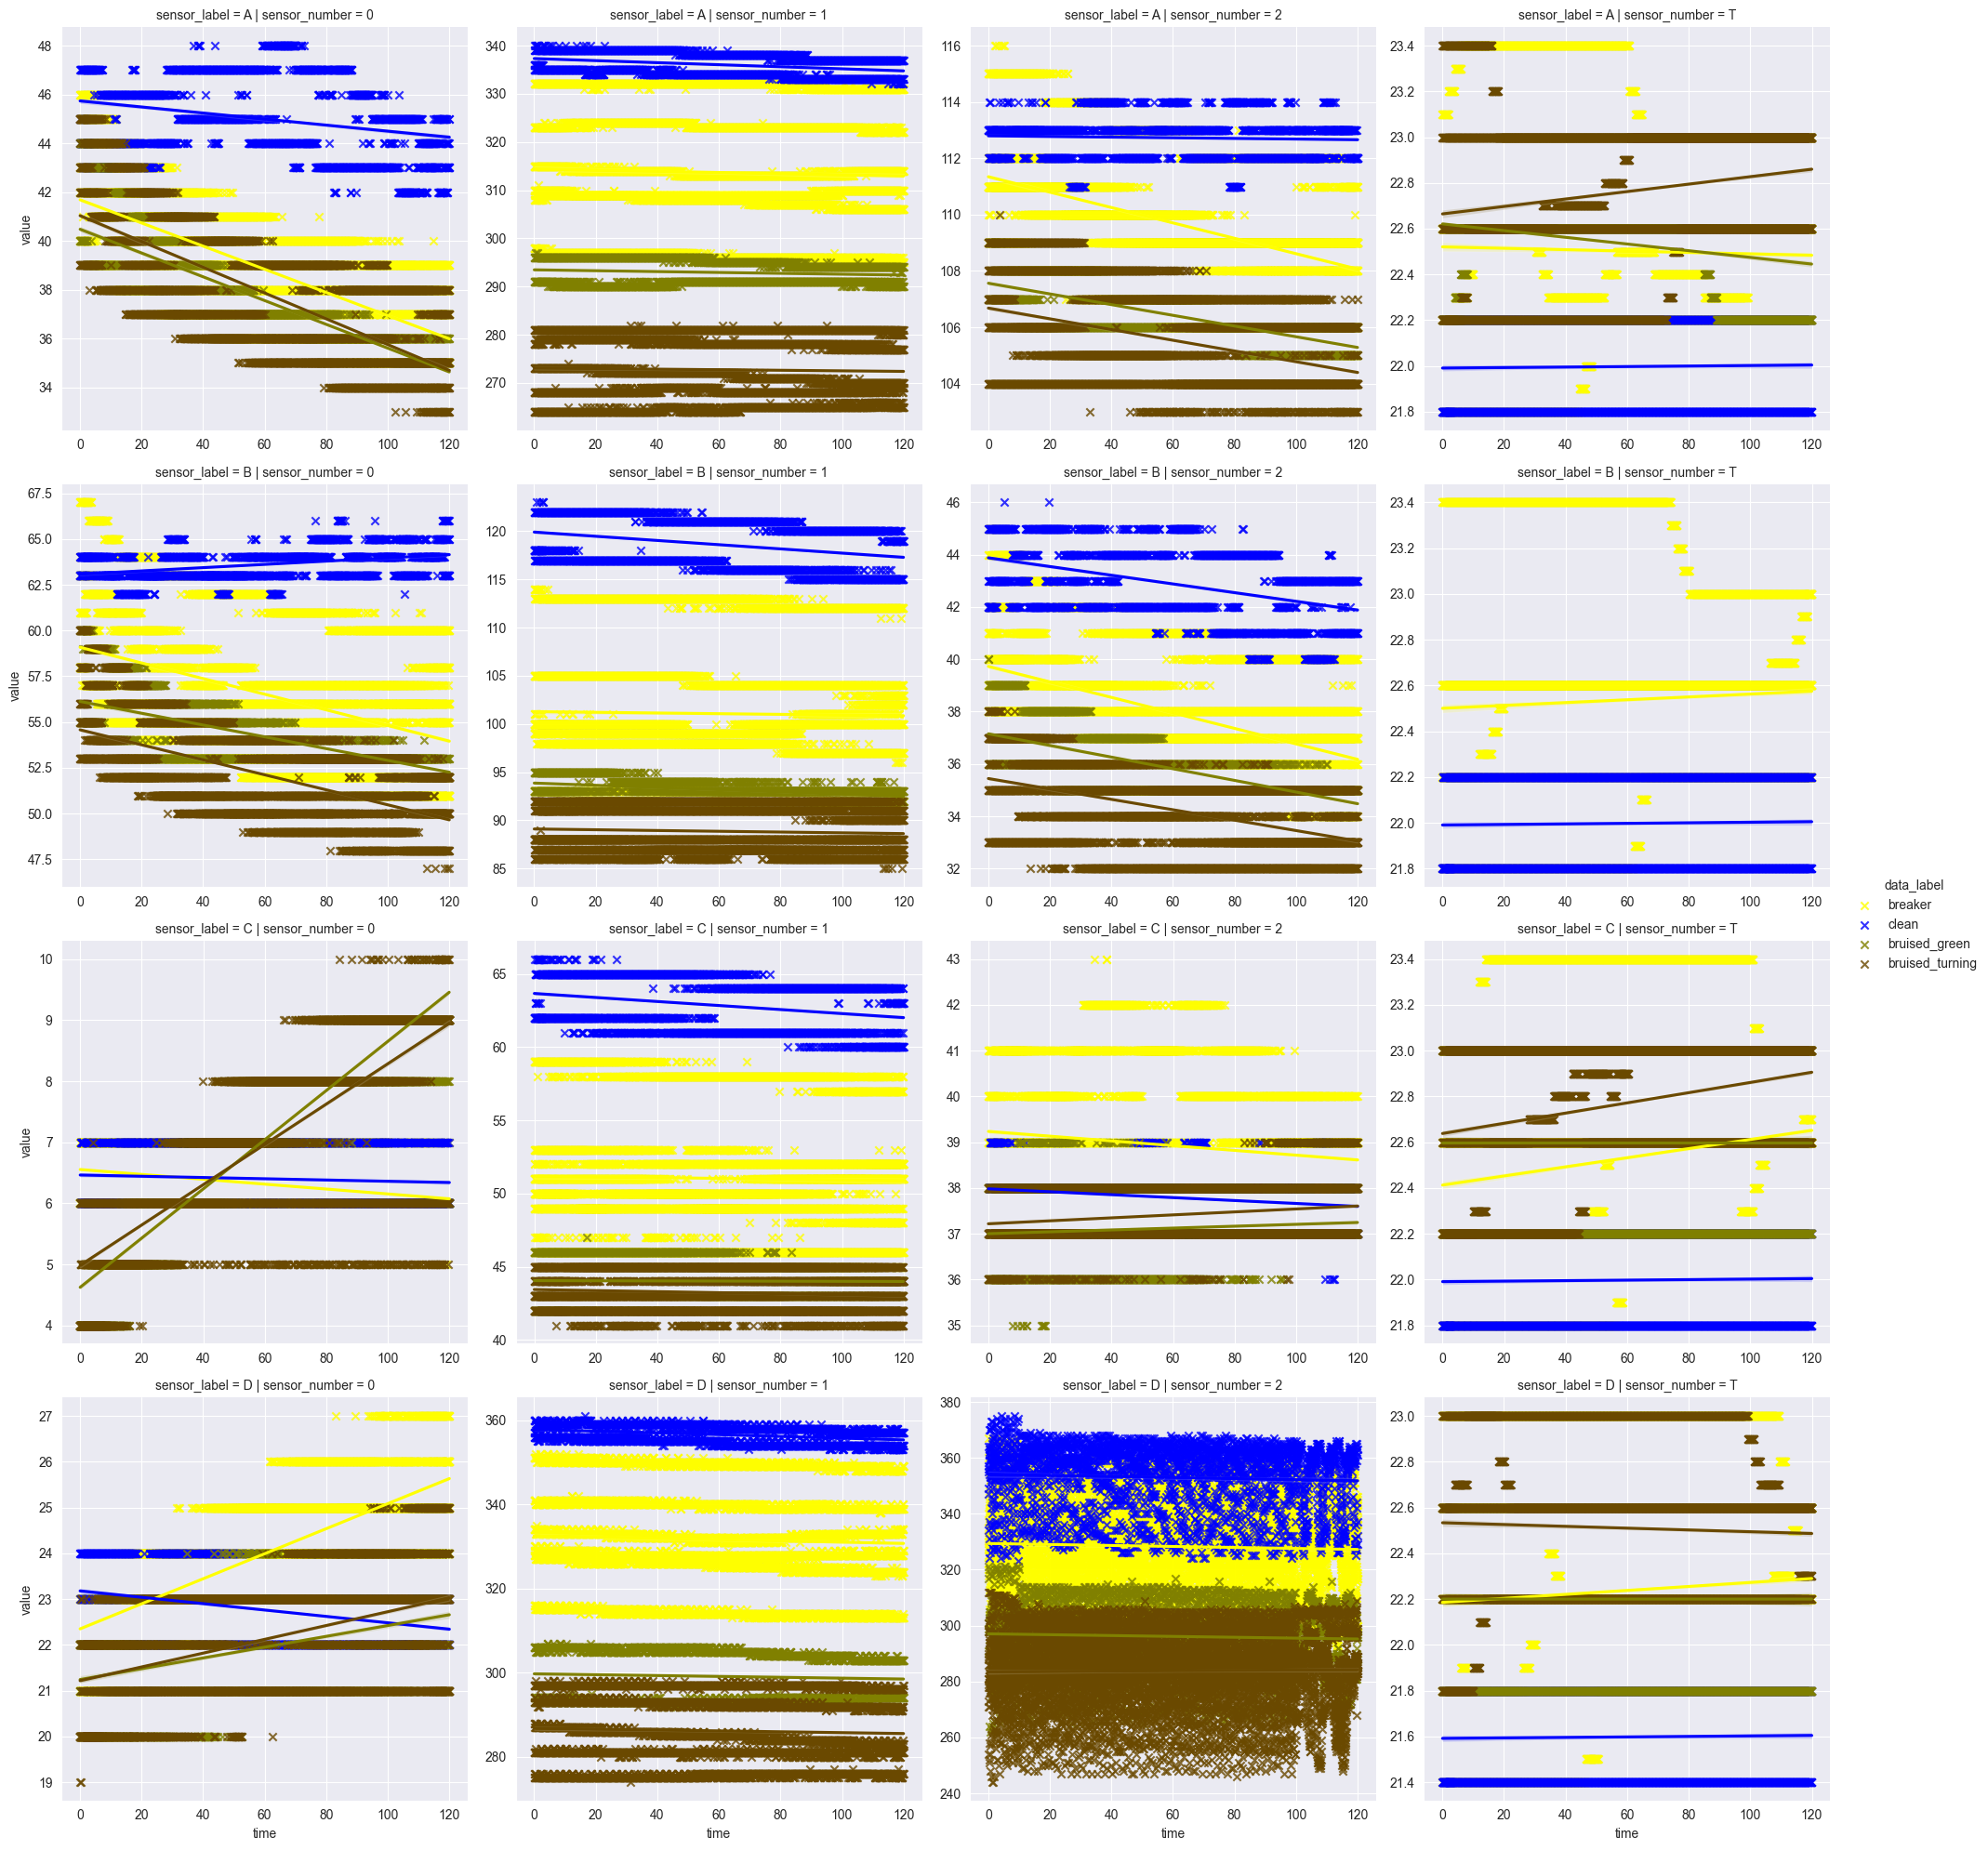

In [7]:
#graphing!

import seaborn as sns
from matplotlib import pyplot as plt

filter_df = filtered_df[filtered_df.time < 120.00]
# filter_df = filter_df[filter_df.data_label.str.contains('red|spoiled|turning|breaker|green')]
# filter_df = filter_df[filter_df.data_label.str.contains('red|clean|red_bruised|breaker')]
# filter_df = filter_df[filter_df.sensor_number == 1]

colors = {'breaker': 'yellow', 'green': 'green', 'red': 'red', 'turning': 'orange', 'spoiled': 'brown', 'clean': 'blue', 'aeration': 'purple', 'red_bruised': 'pink', 'bruised_green': 'olive', 'bruised_turning': '#6A4900'}
sns.lmplot(data=filter_df, x='time', y='value', hue='data_label', col='sensor_number', palette=colors,
           row='sensor_label', legend='full', markers='x', facet_kws=dict(sharex=False, sharey=False))